In [1]:
# Cell a - Get the data
%pip install tensorflow
import tensorflow as tf  # Import TensorFlow for dataset operations

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Create dictionaries for the datasets:
unsupervised_renee = { 'images': x_train }     
supervised_renee   = { 'images': x_test, 'labels': y_test }  




Note: you may need to restart the kernel to use updated packages.


In [2]:
# Cell b - Data Pre-preprocessing
# Normalize pixel values to the range [0, 1]
unsupervised_renee['images'] = unsupervised_renee['images'] / 255.0
supervised_renee['images']   = supervised_renee['images'] / 255.0

# One-hot encode the labels using TensorFlow's to_categorical
supervised_renee['labels'] = tf.keras.utils.to_categorical(supervised_renee['labels'])

# Print the shapes of the datasets after pre-processing
print("Unsupervised Images Shape:", unsupervised_renee['images'].shape)
print("Supervised Images Shape:", supervised_renee['images'].shape)
print("Supervised Labels Shape:", supervised_renee['labels'].shape)


Unsupervised Images Shape: (60000, 28, 28)
Supervised Images Shape: (10000, 28, 28)
Supervised Labels Shape: (10000, 10)


In [5]:
# Cell c - Data Preparation (Training, Validation, Testing)
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Split unsupervised dataset
unsup_images = unsupervised_renee['images']
unsup_train, unsup_val = train_test_split(unsup_images, test_size=3000, random_state=5)
# Flatten images for storage in a DataFrame
unsupervised_train_renee = pd.DataFrame(unsup_train.reshape(unsup_train.shape[0], -1))
unsupervised_val_renee   = pd.DataFrame(unsup_val.reshape(unsup_val.shape[0], -1))

# 2. Discard 7,000 samples from supervised dataset (keep 3,000) with random_state=5
sup_images = supervised_renee['images']
sup_labels = supervised_renee['labels']
X_remaining, _, y_remaining, _ = train_test_split(sup_images, sup_labels, train_size=3000, random_state=5)

# 3. Split the remaining 3,000 samples into training (1,800), validation (600), and testing (600) using random_state=5
x_train, x_temp, y_train, y_temp = train_test_split(X_remaining, y_remaining, train_size=1800, random_state=5)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=5)
# Flatten supervised images for storage in DataFrames
x_train_renee = pd.DataFrame(x_train.reshape(x_train.shape[0], -1))
x_val_renee   = pd.DataFrame(x_val.reshape(x_val.shape[0], -1))
x_test_renee  = pd.DataFrame(x_test.reshape(x_test.shape[0], -1))
y_train_renee = pd.DataFrame(y_train)
y_val_renee   = pd.DataFrame(y_val)
y_test_renee  = pd.DataFrame(y_test)

# 4. Display the shapes of all prepared datasets
print("Unsupervised Training Shape:", unsupervised_train_renee.shape)
print("Unsupervised Validation Shape:", unsupervised_val_renee.shape)
print("Supervised x_train Shape:", x_train_renee.shape)
print("Supervised x_val Shape:", x_val_renee.shape)
print("Supervised x_test Shape:", x_test_renee.shape)
print("Supervised y_train Shape:", y_train_renee.shape)
print("Supervised y_val Shape:", y_val_renee.shape)
print("Supervised y_test Shape:", y_test_renee.shape)


Unsupervised Training Shape: (57000, 784)
Unsupervised Validation Shape: (3000, 784)
Supervised x_train Shape: (1800, 784)
Supervised x_val Shape: (600, 784)
Supervised x_test Shape: (600, 784)
Supervised y_train Shape: (1800, 10)
Supervised y_val Shape: (600, 10)
Supervised y_test Shape: (600, 10)


In [6]:
# Cell d - Build, Train, and Validate a baseline CNN Model
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, InputLayer
from tensorflow.keras.utils import plot_model

# Prepare supervised data for CNN by reshaping flattened images to (28, 28, 1)
x_train_cnn = np.array(x_train_renee).reshape(-1, 28, 28, 1)
x_val_cnn   = np.array(x_val_renee).reshape(-1, 28, 28, 1)
y_train_cnn = np.array(y_train_renee)
y_val_cnn   = np.array(y_val_renee)

# Build the CNN model
cnn_v1_model_renee = Sequential([
    InputLayer(input_shape=(28, 28, 1)),
    Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
    Conv2D(8, (3, 3), activation='relu', padding='same', strides=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(y_train_cnn.shape[1], activation='softmax') 
])

# Compile the model
cnn_v1_model_renee.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary and optionally save a diagram of its architecture
cnn_v1_model_renee.summary()


# Train the model for 10 epochs with batch size 256 using the supervised training/validation sets
cnn_v1_history_renee = cnn_v1_model_renee.fit(x_train_cnn, y_train_cnn,
                                               epochs=10,
                                               batch_size=256,
                                               validation_data=(x_val_cnn, y_val_cnn))


c:\Users\renee\.conda\envs\Centennial\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        39,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,630 (162.62 KB)

 Trainable params: 41,630 (162.62 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.1410 - loss: 2.2490 - val_accuracy: 0.3083 - val_loss: 2.0491
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3367 - loss: 1.9662 - val_accuracy: 0.5767 - val_loss: 1.6480
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5710 - loss: 1.5330 - val_accuracy: 0.6800 - val_loss: 1.1670
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6498 - loss: 1.0924 - val_accuracy: 0.6800 - val_loss: 0.8877
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6852 - loss: 0.8832 - val_accuracy: 0.6767 - val_loss: 0.8586
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6685 - loss: 0.8766 - val_accuracy: 0.6817 - val_loss: 0.8199
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6636 - loss: 0.8444 - val_accuracy: 0.6783 - val_loss: 0.8704
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7092 - loss: 0.7892 - val_accuracy: 0.7100 - val_loss: 0.8317


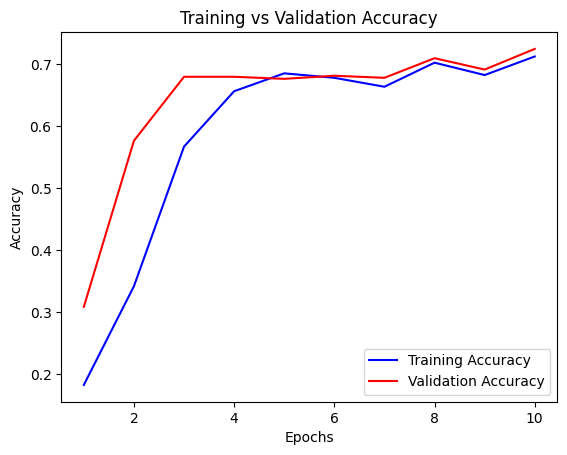

Test Accuracy: 0.7367
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


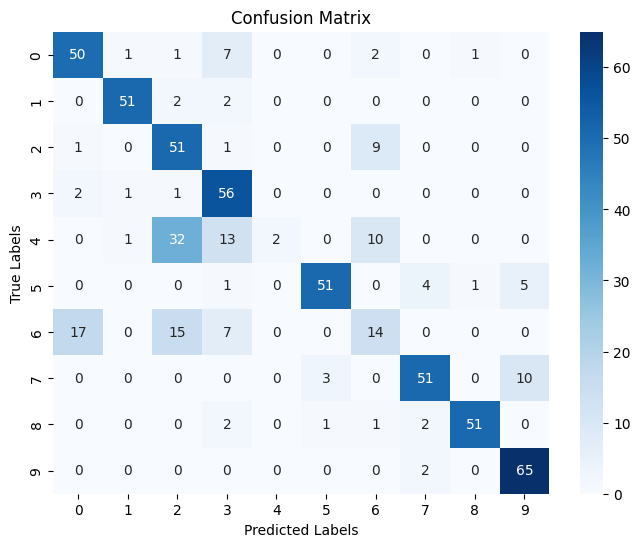

In [11]:
# Cell e - Test and analyze the baseline model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# 1. Plot Training vs Validation Accuracy
history = cnn_v1_history_renee.history
epochs = range(1, len(history['accuracy']) + 1)
plt.figure()
plt.plot(epochs, history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(epochs, history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# 2. Evaluate the model on the test dataset
x_test_cnn = np.array(x_test_renee).reshape(-1, 28, 28, 1)
y_test_cnn = np.array(y_test_renee)
test_loss, test_accuracy = cnn_v1_model_renee.evaluate(x_test_cnn, y_test_cnn, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


# 3. Create predictions on the test dataset
cnn_predictions_renee = cnn_v1_model_renee.predict(x_test_cnn)


# 4. Plot the confusion matrix
y_true = np.argmax(y_test_cnn, axis=1)
y_pred = np.argmax(cnn_predictions_renee, axis=1)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


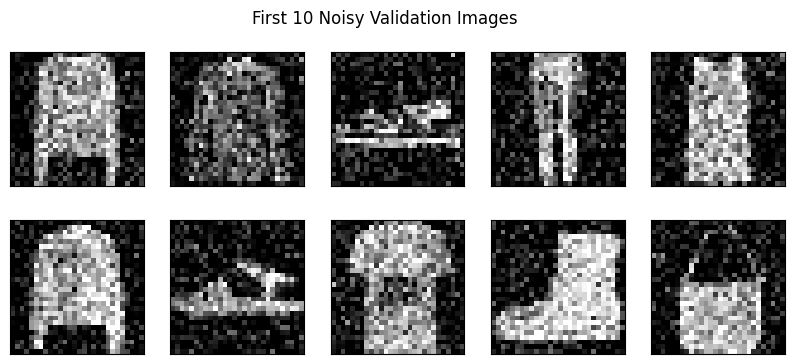

In [ ]:
# Cell f - Add random noise to unsupervised dataset
import tensorflow as tf
import matplotlib.pyplot as plt

# Set random seed 
tf.random.set_seed(5)

# 1. Add random noise with a factor of 0.2
x_train_noisy_renee = unsup_train + tf.random.normal(unsup_train.shape, mean=0.0, stddev=0.2, seed=5)
x_val_noisy_renee   = unsup_val   + tf.random.normal(unsup_val.shape, mean=0.0, stddev=0.2, seed=5)

# 2. Clip the noisy values to the range [0, 1]
x_train_noisy_renee = tf.clip_by_value(x_train_noisy_renee, 0.0, 1.0)
x_val_noisy_renee   = tf.clip_by_value(x_val_noisy_renee, 0.0, 1.0)

# 3. Display the first 10 images from x_val_noisy_renee
plt.figure(figsize=(10, 4))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_val_noisy_renee[i], cmap='gray')
    plt.xticks([]), plt.yticks([])
plt.suptitle("First 10 Noisy Validation Images")
plt.show()


Model: "autoencoder_renee"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_renee (InputLayer)       │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_conv1 (Conv2D)          │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_conv2 (Conv2D)          │ (None, 7, 7, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_deconv1                 │ (None, 14, 14, 8)      │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_deconv2                 │ (None, 28, 28, 16)     │         1,168 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_conv (Conv2D)           │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,217 (12.57 KB)

 Trainable params: 3,217 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 0.0999 - val_loss: 0.0160
Epoch 2/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0150 - val_loss: 0.0130
Epoch 3/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0127 - val_loss: 0.0118
Epoch 4/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0116 - val_loss: 0.0110
Epoch 5/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0108 - val_loss: 0.0103
Epoch 6/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 7/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0098 - val_loss: 0.0095
Epoch 8/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 9/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0092 - val_loss: 0.0090
Epoch 10/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0090 - val_loss: 0.0088
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


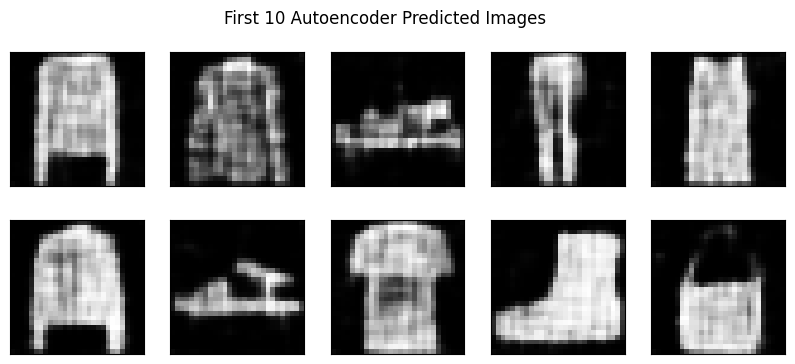

In [ ]:
# Cell g - Build and pretrain Autoencoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose
import matplotlib.pyplot as plt
import numpy as np

# 1. Define Input layer based on image size (28,28,1)
inputs_renee = Input(shape=(28,28,1), name='inputs_renee')

# 2. Encoder Section (e_renee)
enc = Conv2D(16, (3,3), activation='relu', padding='same', strides=2, name='encoder_conv1')(inputs_renee)
e_renee = Conv2D(8, (3,3), activation='relu', padding='same', strides=2, name='encoder_conv2')(enc)

# 3. Decoder Section (d_renee)
dec = Conv2DTranspose(8, (3,3), activation='relu', padding='same', strides=2, name='decoder_deconv1')(e_renee)
dec = Conv2DTranspose(16, (3,3), activation='relu', padding='same', strides=2, name='decoder_deconv2')(dec)
d_renee = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='decoder_conv')(dec)

# 4. Build and compile the autoencoder model
autoencoder_renee = Model(inputs=inputs_renee, outputs=d_renee, name='autoencoder_renee')
autoencoder_renee.compile(optimizer='adam', loss='mean_squared_error')

# 5. Display model summary and (optionally) a network diagram
autoencoder_renee.summary()

# 6. Prepare training data for the autoencoder:
# Reshape unsup_train and unsup_val to (N,28,28,1)
x_train_auto = unsup_train.reshape(-1,28,28,1)
x_val_auto   = unsup_val.reshape(-1,28,28,1)

# Use the noisy images from Cell f as input. If they lack a channel dimension, add it.
x_train_noisy_auto = x_train_noisy_renee if len(x_train_noisy_renee.shape) == 4 else tf.expand_dims(x_train_noisy_renee, axis=-1)
x_val_noisy_auto   = x_val_noisy_renee   if len(x_val_noisy_renee.shape)   == 4 else tf.expand_dims(x_val_noisy_renee, axis=-1)

# 7. Train the autoencoder with 10 epochs, batch size 256, shuffle enabled
autoencoder_history_renee = autoencoder_renee.fit(x_train_noisy_auto, x_train_auto,
                                                   epochs=10,
                                                   batch_size=256,
                                                   shuffle=True,
                                                   validation_data=(x_val_noisy_auto, x_val_auto))

# 8. Create predictions on the validation unsupervised dataset
autoencoder_predictions_renee = autoencoder_renee.predict(x_val_noisy_auto)

# 9. Display the first 10 predicted images using matplotlib (remove xticks/yticks)
plt.figure(figsize=(10,4))
for i in range(10):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(np.squeeze(autoencoder_predictions_renee[i]), cmap='gray')
    plt.xticks([]), plt.yticks([])
plt.suptitle("First 10 Autoencoder Predicted Images")
plt.show()


In [ ]:
# Cell h - Build and perform transfer learning on a CNN with the Autoencoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense

# 1. Transfer Autoencoder's input and encoder
base_encoder = Model(inputs=autoencoder_renee.input,
                     outputs=autoencoder_renee.get_layer('encoder_conv2').output)

# 2. Build the CNN model using transfer learning
x = base_encoder.output
x = Flatten(name='flatten')(x)
x = Dense(100, activation='relu', name='fc_100')(x)
# Number of classes from supervised_renee['labels'] shape (assumed defined in Cell b)
num_classes = y_train_cnn.shape[1]
outputs = Dense(num_classes, activation='softmax', name='predictions')(x)
cnn_v2_renee = Model(inputs=base_encoder.input, outputs=outputs, name='cnn_v2_renee')

# 3. Compile the model
cnn_v2_renee.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Display model summary and, optionally, a network diagram
cnn_v2_renee.summary()

# 5. Train the model on supervised dataset (using x_train_cnn, y_train_cnn, x_val_cnn, y_val_cnn)
cnn_v2_history_renee = cnn_v2_renee.fit(x_train_cnn, y_train_cnn,
                                         epochs=10,
                                         batch_size=256,
                                         validation_data=(x_val_cnn, y_val_cnn),
                                         shuffle=True)


Model: "cnn_v2_renee"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs_renee (InputLayer)       │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_conv1 (Conv2D)          │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_conv2 (Conv2D)          │ (None, 7, 7, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_100 (Dense)                  │ (None, 100)            │        39,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,630 (162.62 KB)

 Trainable params: 41,630 (162.62 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.1489 - loss: 3.1692 - val_accuracy: 0.3733 - val_loss: 1.7332
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4161 - loss: 1.6021 - val_accuracy: 0.5650 - val_loss: 1.2760
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5324 - loss: 1.2351 - val_accuracy: 0.6250 - val_loss: 1.0656
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6069 - loss: 1.0413 - val_accuracy: 0.6783 - val_loss: 0.9106
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6480 - loss: 0.9132 - val_accuracy: 0.7150 - val_loss: 0.8296
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6675 - loss: 0.8428 - val_accuracy: 0.7300 - val_loss: 0.7886
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6894 - loss: 0.8028 - val_accuracy: 0.7417 - val_loss: 0.7569
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7027 - loss: 0.7743 - val_accuracy: 0.7350 - val_loss: 0.7430


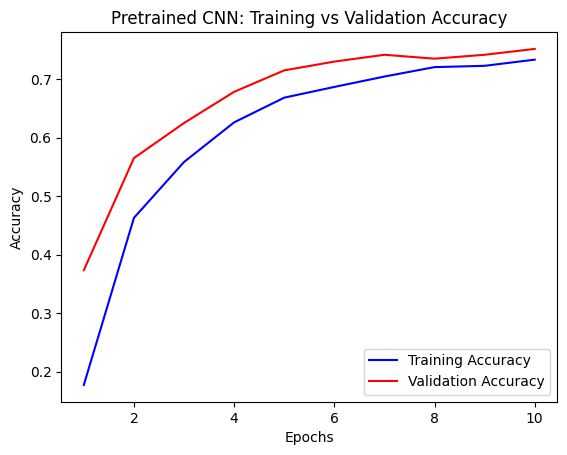

Test Accuracy: 0.7500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


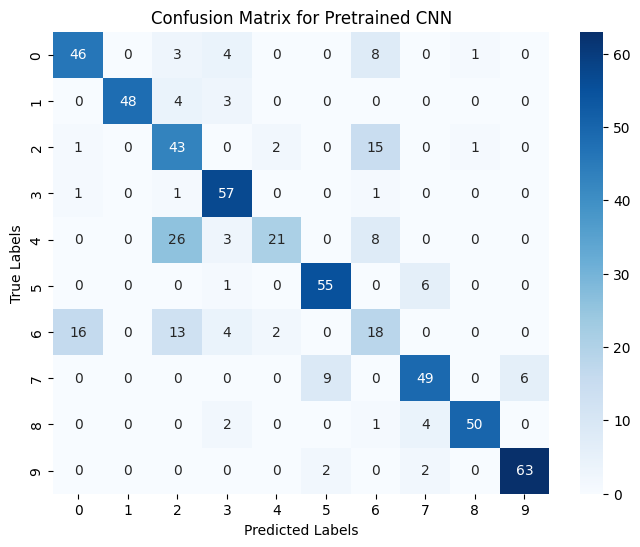

In [15]:
# Cell i - Test and analyze the pretrained CNN model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# 1. Plot Training vs Validation Accuracy
history = cnn_v2_history_renee.history
epochs = range(1, len(history['accuracy']) + 1)
plt.figure()
plt.plot(epochs, history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(epochs, history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Pretrained CNN: Training vs Validation Accuracy')
plt.legend()
plt.show()

# 2. Evaluate the pretrained CNN model on the test dataset
test_loss, test_accuracy = cnn_v2_renee.evaluate(x_test_cnn, y_test_cnn, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# 3. Create predictions on the test dataset
cnn_predictions_renee = cnn_v2_renee.predict(x_test_cnn)

# 4. Plot the confusion matrix
y_true = np.argmax(y_test_cnn, axis=1)
y_pred = np.argmax(cnn_predictions_renee, axis=1)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Pretrained CNN")
plt.show()


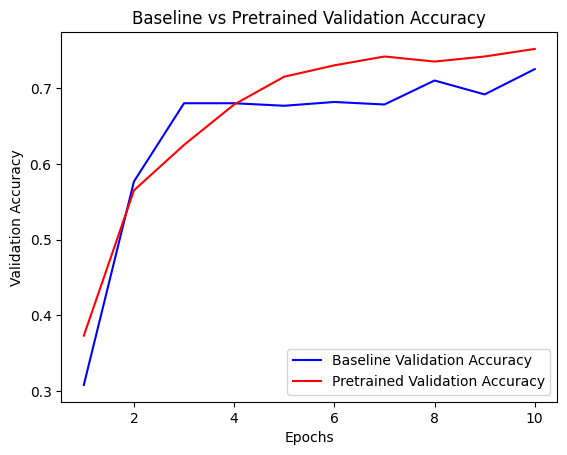

Baseline Test Accuracy: 0.7367
Pretrained Test Accuracy: 0.7500


In [16]:
# Cell j - Compare Baseline vs Pretrained CNN performance
import matplotlib.pyplot as plt

# 1. Plot Validation Accuracy for both models
plt.figure()
plt.plot(range(1, len(cnn_v1_history_renee.history['val_accuracy'])+1),
         cnn_v1_history_renee.history['val_accuracy'], 'b-', label='Baseline Validation Accuracy')
plt.plot(range(1, len(cnn_v2_history_renee.history['val_accuracy'])+1),
         cnn_v2_history_renee.history['val_accuracy'], 'r-', label='Pretrained Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Baseline vs Pretrained Validation Accuracy')
plt.legend()
plt.show()

# 2. Evaluate and compare test accuracy for both models
baseline_loss, baseline_test_accuracy = cnn_v1_model_renee.evaluate(x_test_cnn, y_test_cnn, verbose=0)
pretrained_loss, pretrained_test_accuracy = cnn_v2_renee.evaluate(x_test_cnn, y_test_cnn, verbose=0)
print(f"Baseline Test Accuracy: {baseline_test_accuracy:.4f}")
print(f"Pretrained Test Accuracy: {pretrained_test_accuracy:.4f}")
